In [3]:
import pandas as pd
df = pd.read_csv('AC Data.csv')

## Exploratory Data Analyis and Stats for 18 ACs

In [4]:
df.describe()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
count,43708.000000,43711.000000,43713.000000,43704.000000,43716.000000,43717.000000,43679.000000,43704.000000,43654.000000,43690.000000,43670.000000,43713.000000,43719.000000,43696.000000,43715.000000,43710.000000,43714.000000,43723.000000
mean,2.379368,3.868892,2.568411,2.395158,1.421699,2.518138,2.980883,2.548711,3.184382,1.538344,2.406141,2.699639,4.279893,2.917122,4.046283,2.800050,4.218979,6.462676
std,2.276782,2.545147,1.487508,1.797529,0.767218,1.655560,1.473498,1.504482,1.522291,0.685461,1.554481,1.436087,1.847168,1.454946,2.016898,1.606239,1.125491,2.319242
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.123263,1.706508,1.258299,0.970744,1.543779,2.190803,1.766230,2.294635,1.117139,1.591748,1.949729,3.260674,1.852981,3.023501,1.877626,3.752478,4.013579
50%,2.094330,3.791752,2.486992,2.308961,1.380183,2.665063,3.005071,2.608551,3.082134,1.504554,2.351361,2.727152,4.217381,2.787084,4.001279,2.673698,4.611434,7.131194
75%,3.661752,5.460892,3.441527,3.476123,1.870234,3.616988,3.897857,3.496358,4.096374,1.963707,3.254937,3.566744,5.379832,3.824467,5.260193,3.695294,4.958306,8.314639
max,11.194789,11.147141,8.430909,9.879500,5.495358,9.929291,9.356776,9.331506,10.026747,4.625030,10.363151,9.887306,9.796393,9.054969,10.349998,10.654430,5.950261,11.040031


In [6]:
df1 = df.fillna(0)

## Question 1) Are there any patterns/trends in the data?

## Answer 1) the next few lines plots overall data from beginning to last row, even here we can see ups & downs clearly on a granular level there will be some trends

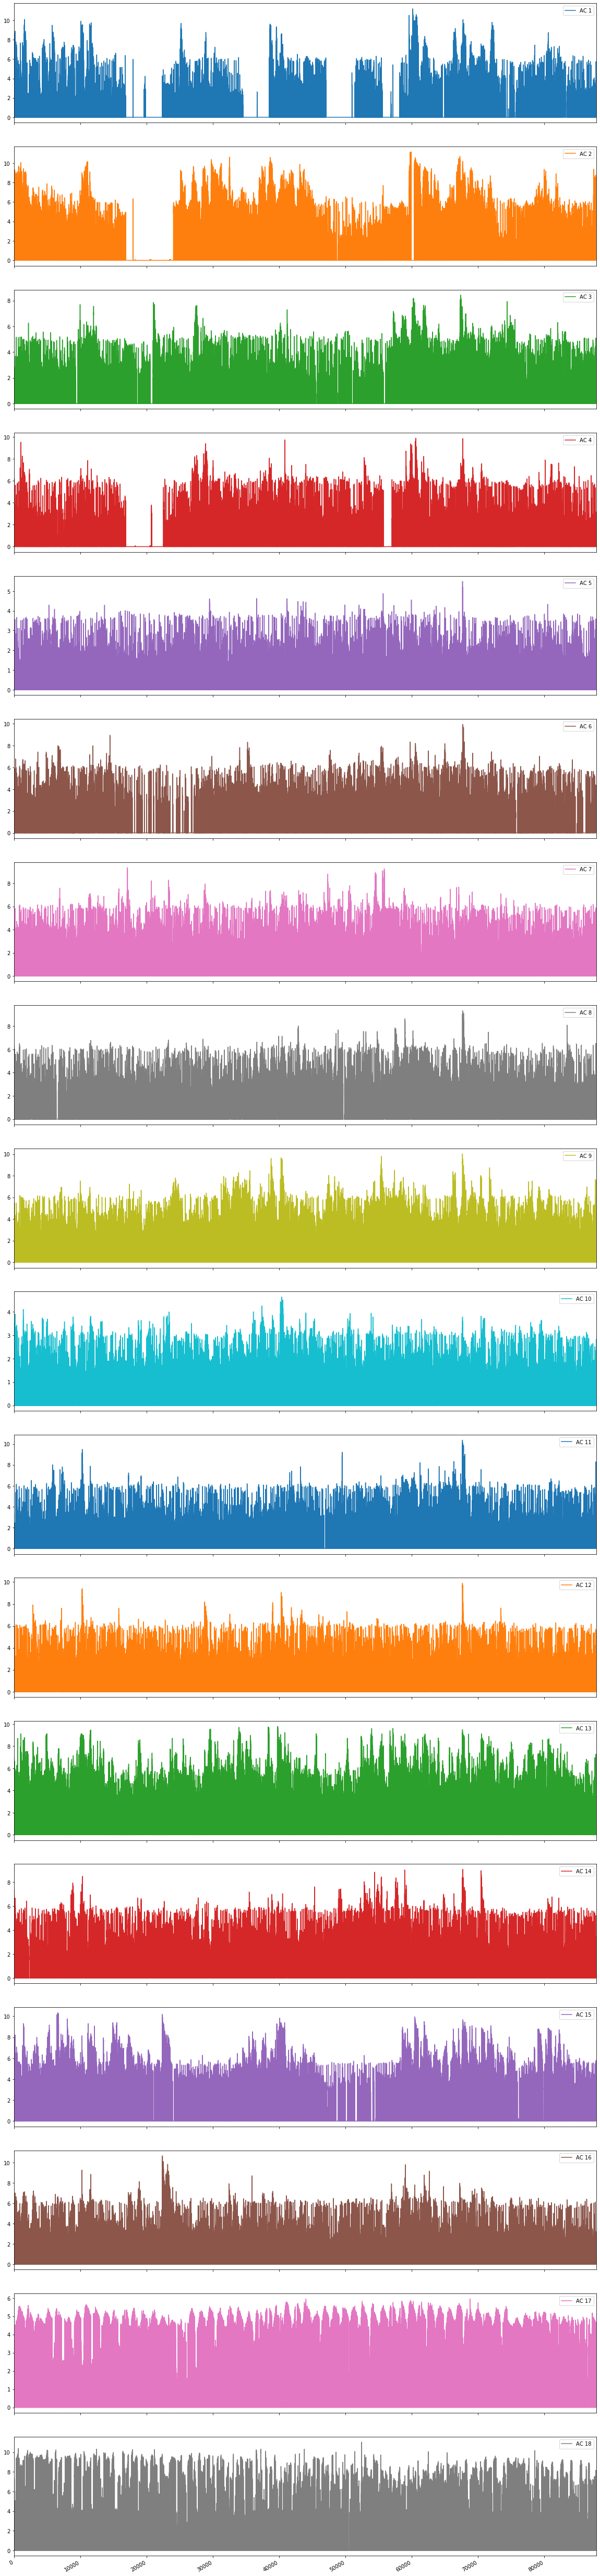

In [42]:
from matplotlib import pyplot as plt
df1.plot(subplots=True,figsize=(20,100))
plt.show()

## Answer 1 now we want to see trend over the last 172 hours that is on last week's data trends are clearly visible now

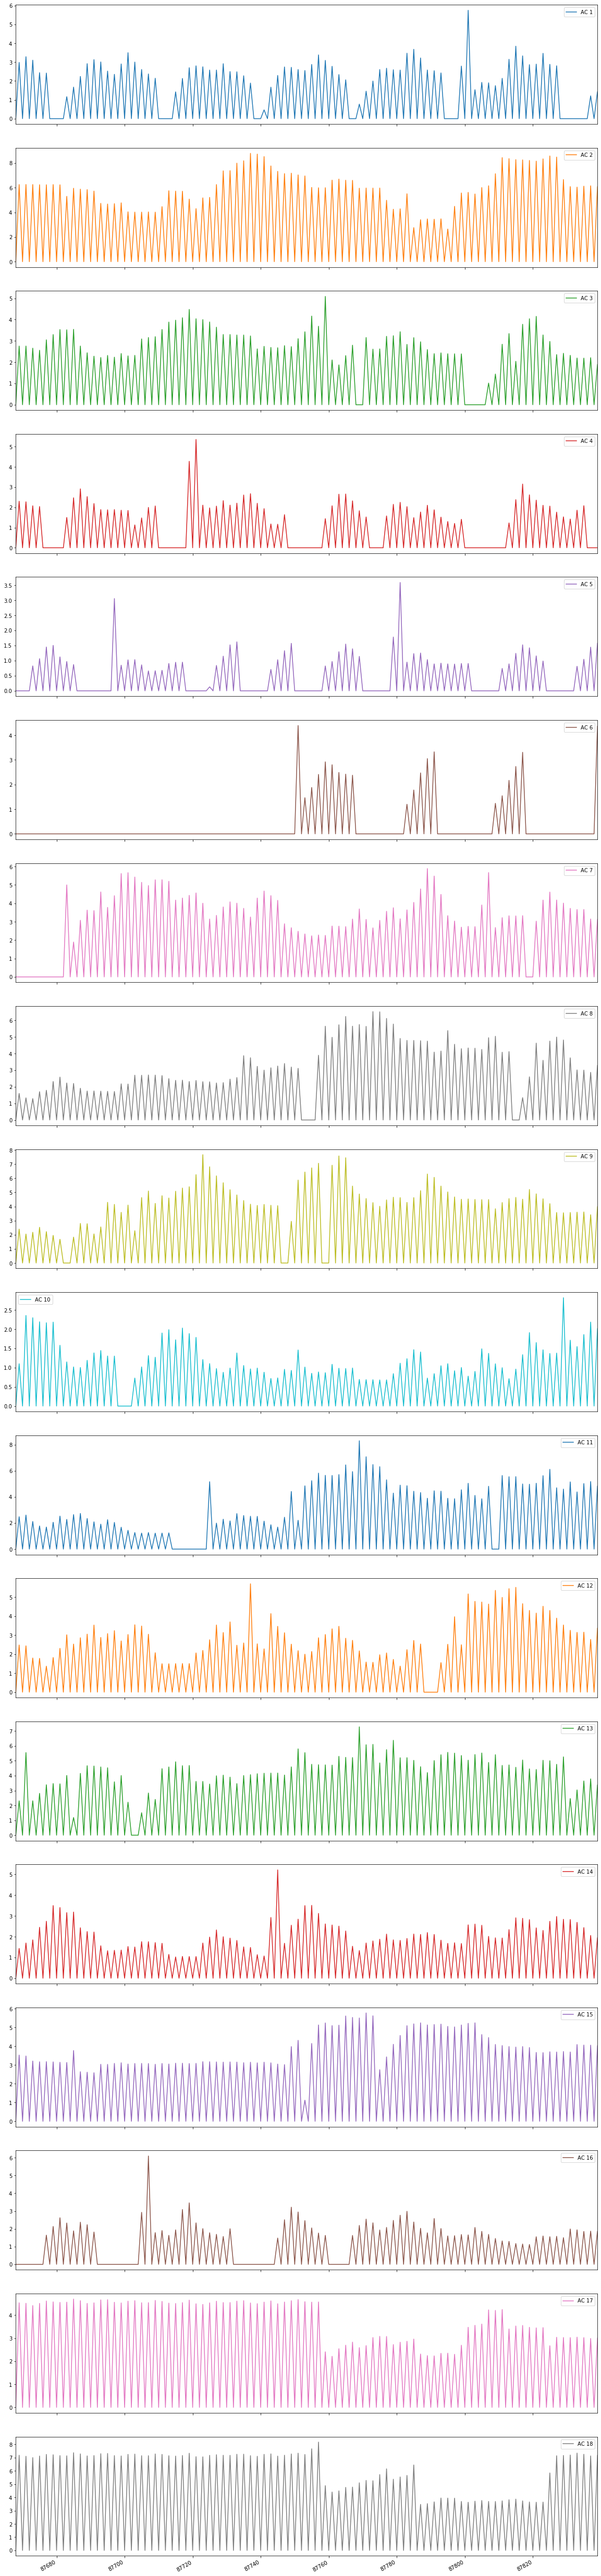

In [113]:
from matplotlib import pyplot as plt
df1.iloc[-172:,:].plot(subplots=True,figsize=(20,100))
plt.show()

## Question 2 Which AC was used the most/least?
## Answer 2 least used AC in terms of number of times

In [58]:
df.describe().iloc[0].idxmin()

'AC 9'

## Answer 2) most used AC in terms of number of times (not power usage)

In [114]:
df.describe().iloc[0].idxmax()

'AC 18'

## Answer 2) ACs ranked in terms of power usage from least to highest

In [87]:
power_usage = df1.sum().reset_index()
power_usage.iloc[1:,:].sort_values(by=0)

,index,0
5,AC 5,62151
10,AC 10,67210.2
1,AC 1,103997
4,AC 4,104678
11,AC 11,105076
6,AC 6,110085
8,AC 8,111389
3,AC 3,112273
12,AC 12,118009
16,AC 16,122390


## Answer 2) ACs ranked in terms of number of times used

In [90]:
times_used = df.count().reset_index()
times_used.iloc[1:,:].sort_values(by=0)

,index,0
9,AC 9,43654
11,AC 11,43670
7,AC 7,43679
10,AC 10,43690
14,AC 14,43696
4,AC 4,43704
8,AC 8,43704
1,AC 1,43708
16,AC 16,43710
2,AC 2,43711


## Additional Insights ACs ranked in terms of average power usage

In [94]:
avg_usage =  df1.mean().reset_index()
avg_usage.iloc[1:,:].sort_values(by=0)

,index,0
4,AC 5,0.707548
9,AC 10,0.765144
3,AC 4,1.191689
10,AC 11,1.196223
5,AC 6,1.253249
7,AC 8,1.268088
2,AC 3,1.278153
11,AC 12,1.343457
15,AC 16,1.393331
13,AC 14,1.451122


## Answer 4) usage forecasting for next 2 hour on the basis of last 48 hours historical data, tuning parameters will given even better predictions

In [122]:
# from statsmodels.tsa.statespace.varmax import VARMAX
# model = VARMAX(endog=df1.iloc[-48:,1:], order=(0, 1))
# model_fit = model.fit(disp=False)
yhat = model_fit.forecast(2)
yhat

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
87840,0.606684,2.840093,1.071764,0.375763,0.086020,-0.479727,0.341519,1.783936,1.409528,0.859036,0.734386,1.023451,2.043220,0.964697,1.365021,0.629689,1.420429,1.811015
87841,1.002444,3.315668,1.128751,0.628291,0.367612,0.317536,1.707369,1.927108,2.161770,0.703730,2.330847,2.008042,2.348232,1.183317,2.138859,0.815541,1.621914,2.432024


### Question 3) Can we relate this power data with the outside temperature of Gurgaon? (Feel free to use temperature data from any website online. How will you fetch that data in your analysis?)

### Answer 3) I tried but was unable to find temperature data for Gurgaon in the format I wanted, but it can be scraped using scrapy library and can be converted to what we want and then we can store it alongside our 18 columns in this dataset/dataframe and then we can do a co-relation mapping between consumption and temperature using pandas.DataFrame.corr() on daily, weekly, monthly level